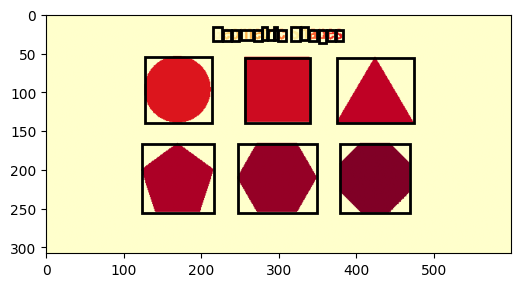

In [ ]:
#gannhananh

from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('./geometric.png').convert('L')
a = np.asarray(data)

thres = threshold_otsu(a)

b = a > thres
# labelling is performed on b
c = label(b)
cl = Image.fromarray(c)

cl_uint8 = cl.point(lambda i: i * 10).convert('L')  # nhân để tăng độ sáng nếu cần
iio.imsave('./label_output.jpg', cl_uint8)

properties = ['Area', 'Centroid', 'BoundingBox']
d = regionprops(c)


fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(c, cmap='YlOrRd')

for i in d:
    lr, lc, ur, uc = i['BoundingBox']
    rec_width = uc - lc
    rec_height = ur - lr

    rect = mpatches.Rectangle((lc, lr), rec_width, rec_height, fill=False,
                              edgecolor='black', linewidth=2)
    ax.add_patch(rect)

plt.show()

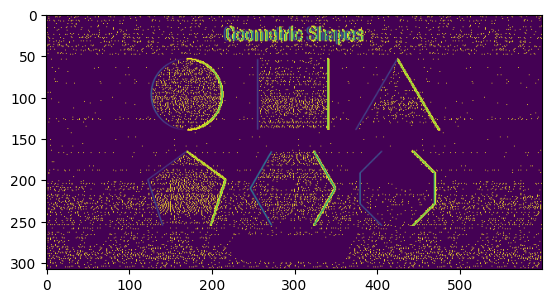

In [ ]:
#dotimcanhtheochieudoc

from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png').convert('L')
bmg = abs(data - nd.shift(data, (0, 1), order=0))
plt.imshow(bmg)
plt.show()

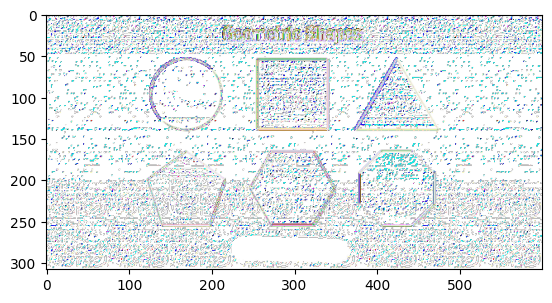

In [ ]:
#dotimcanhsoberfilter

from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

data = Image.open('geometric.png')
a = nd.sobel(data, axis=0)
b = nd.sobel(data, axis=1)
bmg = abs(a) + abs(b)
plt.imshow(bmg)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-49.800000000000004..255.0].


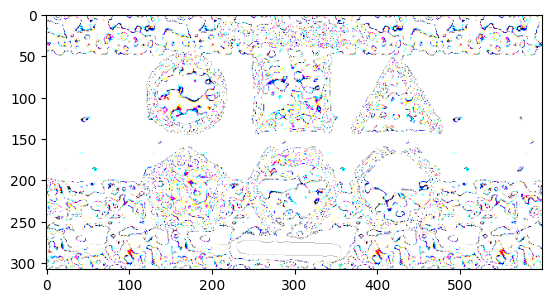

In [6]:
#xacdinhgocdoituong

from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def Harris(indata, alpha=0.2):
    x = nd.sobel(indata, 0)
    y = nd.sobel(indata, 1)
    x1 = x ** 2
    y1 = y ** 2
    xy = abs(x * y)
    x1 = nd.gaussian_filter(x1, 3)
    y1 = nd.gaussian_filter(y1, 3)
    xy = nd.gaussian_filter(xy, 3)

    detC = x1 * y1 - 2 * xy
    trC = x1 + y1
    R = detC - alpha * trC**2
    return R

data = Image.open('geometric.png')
bmg = Harris(data)
plt.imshow(bmg)
plt.show()

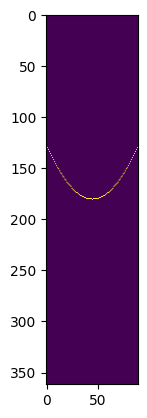

In [7]:
#Hough Transform
#Dò tìm đường thẳng trong ảnh

import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.filters.thresholding import threshold_otsu

def LineHough(data, gamma):
    V, H = data.shape
    R = int(np.sqrt(V * V + H * H))
    ho = np.zeros((R, 90), float)  # Hough space
    w = data + 0
    ok = 1
    theta = np.arange(90) / 180.0 * np.pi
    tp = np.arange(90).astype(float)
    
    while ok:
        mx = w.max()
        if mx < gamma:
            ok = 0
        else:
            v, h = divmod(w.argmax(), H)
            y = V - v
            x = h
            rh = x * np.cos(theta) + y * np.sin(theta)
            for i in range(len(rh)):
                if 0 <= rh[i] < R and 0 <= tp[i] < 90:
                    ho[int(rh[i]), int(tp[i])] += mx
            w[v, h] = 0
    return ho

data = np.zeros((256, 256))
data[128, 128] = 1
bmg = LineHough(data, 0.5)
plt.imshow(bmg)
plt.show()

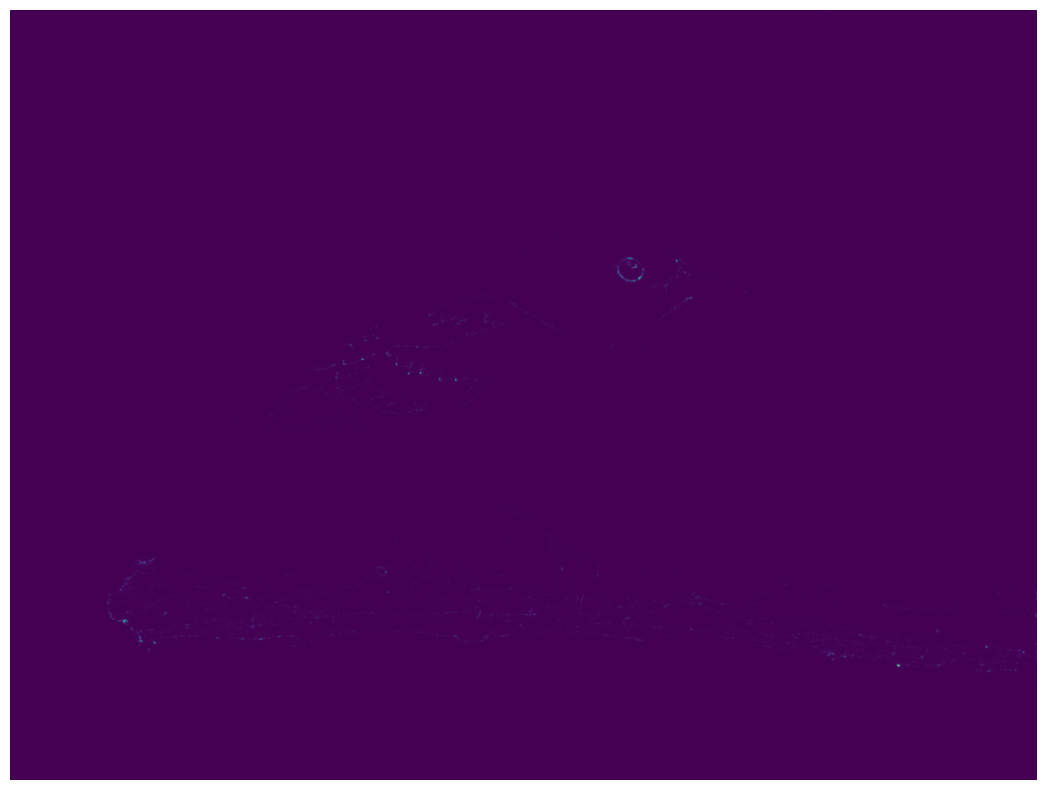

In [8]:
#Dò tìm đường tròn trong ảnh

from PIL import Image
import numpy as np
import cv2
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.morphology import label
from skimage.measure import regionprops
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from skimage.feature import corner_harris
from skimage.color import rgb2gray

data = iio.imread('bird.png')
image_gray = rgb2gray(data)
coordinate = corner_harris(image_gray, k=0.001)

plt.figure(figsize=(20,10))
plt.imshow(coordinate)
plt.axis('off')
plt.show()

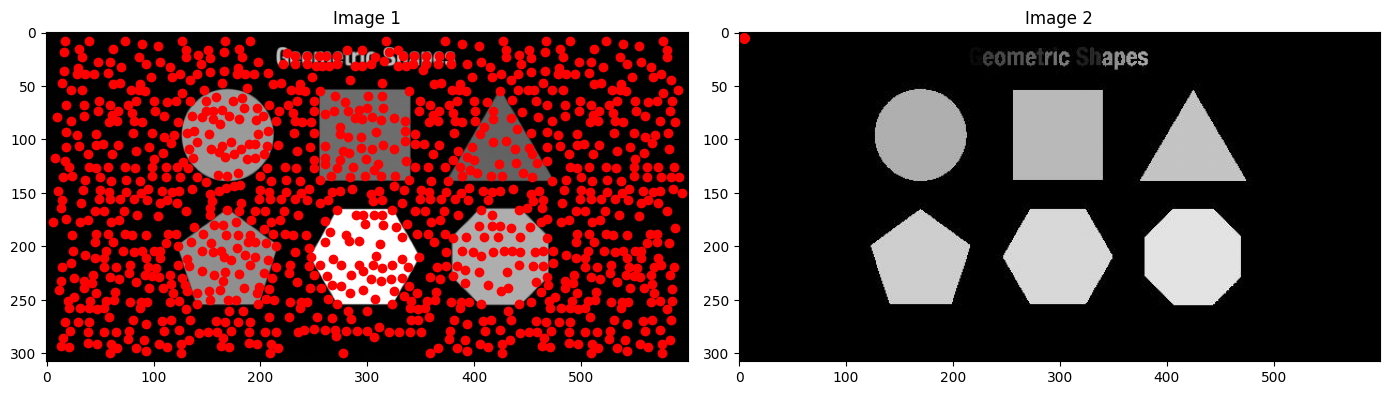

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_peaks
from skimage import io

# --- Hàm trích patch quanh điểm ---
def extract_patches(image, coords, patch_size=11):
    half = patch_size // 2
    patches = []
    valid_coords = []
    for (y, x) in coords:
        if y - half >= 0 and y + half < image.shape[0] and x - half >= 0 and x + half < image.shape[1]:
            patch = image[y - half:y + half + 1, x - half:x + half + 1]
            patches.append(patch.flatten())
            valid_coords.append((y, x))
    return np.array(patches), valid_coords

# --- Hàm so khớp descriptor bằng SSD ---
def match_descriptors(desc1, desc2, threshold=0.5):
    matches = []
    for i, d1 in enumerate(desc1):
        dists = np.linalg.norm(desc2 - d1, axis=1)
        min_idx = np.argmin(dists)
        if dists[min_idx] < threshold * np.mean(dists):  # Lọc tương đồng tốt
            matches.append((i, min_idx))
    return matches

# --- Đọc và chuyển ảnh sang grayscale nếu cần ---
def safe_read_gray(path):
    img = io.imread(path)
    if img.ndim == 3:
        if img.shape[2] == 4:  # RGBA
            img = img[:, :, :3]  # Cắt bỏ kênh Alpha
        return rgb2gray(img)
    return img


img1 = safe_read_gray('geometric.png')
img2 = safe_read_gray('label_output.jpg')

# --- Phát hiện điểm góc Harris ---
corners1 = corner_peaks(corner_harris(img1), min_distance=5)
corners2 = corner_peaks(corner_harris(img2), min_distance=5)

# --- Trích patch đặc trưng ---
desc1, coords1 = extract_patches(img1, corners1, patch_size=11)
desc2, coords2 = extract_patches(img2, corners2, patch_size=11)

# --- So khớp đặc trưng ---
matches = match_descriptors(desc1, desc2)

# --- Hiển thị kết quả ---
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title('Image 1')
ax[1].imshow(img2, cmap='gray')
ax[1].set_title('Image 2')

for i1, i2 in matches:
    y1, x1 = coords1[i1]
    y2, x2 = coords2[i2]
    ax[0].plot(x1, y1, 'ro')
    ax[1].plot(x2, y2, 'ro')

plt.tight_layout()
plt.show()